<a href="https://colab.research.google.com/github/char704/esrgan/blob/main/BasicSR_inference_ESRGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href=https://github.com/xinntao/BasicSR><img src="https://raw.githubusercontent.com/xinntao/BasicSR/master/assets/basicsr.png" width="400"></a>

# ESRGAN Inference Demo
In this colab notebook, we will show how to upsample images with ESRGAN.<br>
Enjoy!

# Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**


## Git clone [BasicSR](https://github.com/xinntao/BasicSR) repo

In [1]:
!rm -rf BasicSR
!git clone https://github.com/xinntao/BasicSR.git
%cd BasicSR

Cloning into 'BasicSR'...
remote: Enumerating objects: 5924, done.
remote: Total 5924 (delta 0), reused 0 (delta 0), pack-reused 5924 (from 1)
Receiving objects: 100% (5924/5924), 4.14 MiB | 16.11 MiB/s, done.
Resolving deltas: 100% (3757/3757), done.
/content/BasicSR


## Set up the enviroment


In [2]:
# Install pytorch
!pip install torch torchvision

# Check torch and cuda versions
import torch
print('Torch Version: ', torch.__version__)
print('CUDA Version: ', torch.version.cuda)
print('CUDNN Version: ', torch.backends.cudnn.version())
print('CUDA Available:', torch.cuda.is_available())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Install requirements
!pip install -r requirements.txt
# Install BasicSR without cuda extentions
!python setup.py develop

running develop
running egg_info
creating basicsr.egg-info
writing basicsr.egg-info/PKG-INFO
writing dependency_links to basicsr.egg-info/dependency_links.txt
writing requirements to basicsr.egg-info/requires.txt
writing top-level names to basicsr.egg-info/top_level.txt
writing manifest file 'basicsr.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'basicsr.egg-info/SOURCES.txt'
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:369: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/basicsr.egg-link (link to .)
Adding basicsr 1.3.3.1 to easy-install.pth file

Installed /content/BasicSR
Processing dependencies for basicsr==1.3.3.1
Searching for yapf==0.31.0
Best match: yapf 0.31.0
Adding yapf 0.31.0 to easy-install.pth fi

## Download pretrained models

In [5]:
!pip install basicsr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 20.5 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214817 sha256=6b16cfaf0883b8bd0ae81fda8bae4f6b6dea96c168ff695e55bc8815ece04e04
  Stored in directory: /root/.cache/pip/wheels/6d/a4/b3/9f888ba88efcae6dd4bbce69832363de9c4051142674f779fa
Successfully built basicsr


In [8]:
!python -m pip install torch==2.0.1 torchvision==0.15.2 --extra-index-url https://download.pytorch.org/whl/cu118



Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 609.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.21.0+cu124
    Uninstalling torchvision-0.21.0+cu124:
      Successfully uninstalled torchvision-0.21.0+cu124
ERROR: pip's dependency resolver does not currently take into account all the packages 

In [9]:
!python scripts/download_pretrained_models.py ESRGAN

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Download 63.8 MB / 63.8 MB: 100% 2043/2043 [00:01<00:00, 1226.11chunk/s]
Download 63.8 MB / 63.8 MB: 100% 2043/2043 [00:01<00:00, 1359.22chunk/s]


## Download demo test datasets

In [10]:
!python scripts/data_preparation/download_datasets.py Set5
!python scripts/data_preparation/download_datasets.py Set14

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Download 2.0 MB / 2.0 MB: 100% 65/65 [00:00<00:00, 3155.47chunk/s]
Extract /content/BasicSR/datasets/Set5.zip to /content/BasicSR/datasets/Set5
Move /content/BasicSR/datasets/Set5/Set5 to /content/BasicSR/datasets/Set5
/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Download 11.9 MB / 11.9 MB: 100% 381/381 [00:00<00:

# Inference with ESRGAN
There are two ways to inference with ESRGAN.
1. Test with **bascisr/test.py** and the **configuration yml** file
2. Test with **a minimum snippet of codes**, which are also put in **inference/inference_esrgan.py**

## Inference method 1: Test with configuration file

1. First, you need to modify the configuration yml file **options/test/ESRGAN/test_ESRGAN_x4_woGT.yml**, especially the dataset path and pretrained model path
```yaml
name: ESRGAN_SRx4_DF2KOST_official
model_type: ESRGANModel
scale: 4
num_gpu: 1  # set num_gpu: 0 for cpu mode
manual_seed: 0
# datasets
datasets:
  test_1:  # the 1st test dataset
    name: Set5
    type: SingleImageDataset
    dataroot_lq: datasets/Set5/LRbicx4
    io_backend:
      type: disk
  test_2:  # the 2st test dataset
    name: Set14
    type: SingleImageDataset
    dataroot_lq: datasets/Set14/LRbicx4
    io_backend:
      type: disk
# network structures
network_g:
  type: RRDBNet
  num_in_ch: 3
  num_out_ch: 3
  num_feat: 64
  num_block: 23
  num_grow_ch: 32
# path
path:
  pretrain_network_g: experiments/pretrained_models/ESRGAN/ESRGAN_SRx4_DF2KOST_official-ff704c30.pth
  strict_load_g: true
# validation settings
val:
  save_img: true
  suffix: ~  # add suffix to saved images, if None, use exp name
```

2. Run the following command
3. The restoration results are in the **results** folder

In [11]:
!python basicsr/test.py -opt options/test/ESRGAN/test_ESRGAN_x4_woGT.yml

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Disable distributed.
2025-03-15 10:01:06,452 INFO: 
                ____                _       _____  ____
               / __ ) ____ _ _____ (_)_____/ ___/ / __ \
              / __  |/ __ `// ___// // ___/\__ \ / /_/ /
             / /_/ // /_/ /(__  )/ // /__ ___/ // _, _/
            /_____/ \__,_//____//_/ \___//____//_/ |_|
     ______                   __   __                 __      __
    / ____/____   ____   ____/ /  / /   __  __ _____ / /__   / /
   / / __ / __ \ / __ \ / __  /  / /   / / / // ___// //_/  / /
  / /_/ // /_/ // /_/ // /_/ /  / /___/ /_/ // /__ / /<    /_/
  \____/ \____/ \____/ \____/  /_____/\____/ 

## Inference method 2: A minimum snippet of testing codes

Make modification accordingly and the restoration results are in the **results/ESRGAN** folder.

In [16]:
!pip install torch torchvision --upgrade --extra-index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.7/848.7 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
!pip install basicsr
!python -m pip install torch==2.0.1 torchvision==0.15.2 --extra-index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118


In [13]:
import cv2
import glob
import numpy as np
import os
import torch

from basicsr.archs.rrdbnet_arch import RRDBNet

# configuration
model_path = '/content/BasicSR/experiments/pretrained_models/ESRGAN/ESRGAN_SRx4_DF2KOST_official-ff704c30.pth'
folder = '/content/BasicSR/datasets/Set14/LRbicx4'
device = 'cuda'

device = torch.device(device)

# set up model
model = RRDBNet(
    num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32)
model.load_state_dict(torch.load(model_path)['params'], strict=True)
model.eval()
model = model.to(device)

os.makedirs('results/ESRGAN', exist_ok=True)
for idx, path in enumerate(sorted(glob.glob(os.path.join(folder, '*')))):
    imgname = os.path.splitext(os.path.basename(path))[0]
    print(idx, imgname)
    # read image
    img = cv2.imread(path, cv2.IMREAD_COLOR).astype(np.float32) / 255.
    img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]],
                                        (2, 0, 1))).float()
    img = img.unsqueeze(0).to(device)
    # inference
    with torch.no_grad():
        output = model(img)
    # save image
    output = output.data.squeeze().float().cpu().clamp_(0, 1).numpy()
    output = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
    output = (output * 255.0).round().astype(np.uint8)
    cv2.imwrite(f'results/ESRGAN/{imgname}_ESRGAN.png', output)


0 baboon
1 barbara
2 bridge
3 coastguard
4 comic
5 face
6 flowers
7 foreman
8 lenna
9 man
10 monarch
11 pepper
12 ppt3
13 zebra


The above code snippet is also put in **inference/inference_esrgan.py**.<br>
You can run this code snippet from the command line:

In [22]:
!python /content/BasicSR/inference/inference_esrgan.py --model_path /content/BasicSR/experiments/pretrained_models/ESRGAN/ESRGAN_SRx4_DF2KOST_official-ff704c30.pth --input /content/BasicSR/datasets/Set14/LRbicx4 --output /content/BasicSR/results


/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Testing 0 baboon
Testing 1 barbara
Testing 2 bridge
Testing 3 coastguard
Testing 4 comic
Testing 5 face
Testing 6 flowers
Testing 7 foreman
Testing 8 lenna
Testing 9 man
Testing 10 monarch
Testing 11 pepper
Testing 12 ppt3
Testing 13 zebra


# Show results

We show and compare the input image, ESRGAN results and the Ground-truth (GT) image.

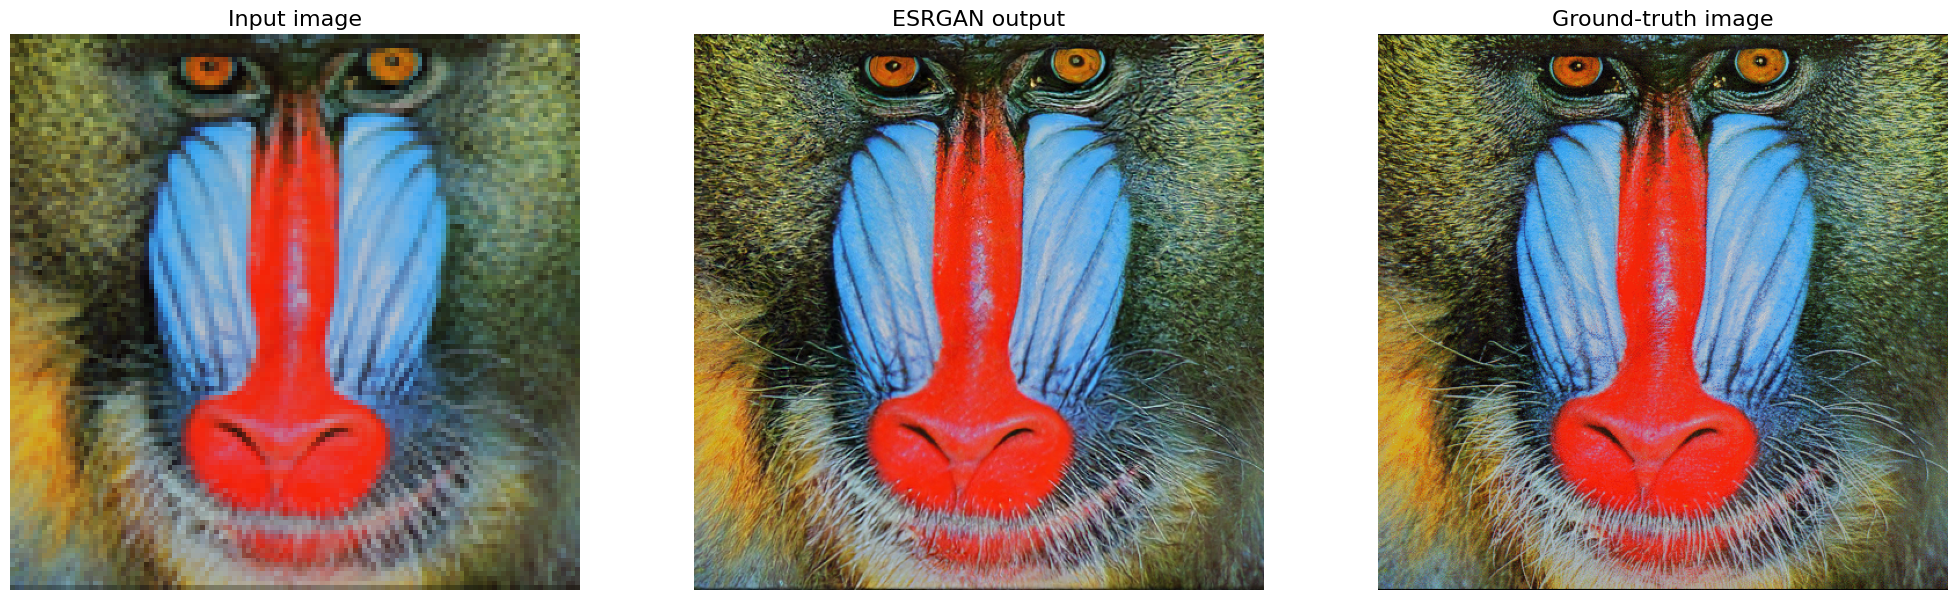

In [24]:
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img_input = imread('/content/BasicSR/datasets/Set14/LRbicx4/baboon.png')
img_esrgan = imread('/content/BasicSR/results/baboon_ESRGAN.png')
img_gt = imread('/content/BasicSR/datasets/Set14/GTmod12/baboon.png')

# show and compare the results
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 3, 1)
plt.title('Input image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 3, 2)
plt.title('ESRGAN output', fontsize=16)
ax2.axis('off')
ax3 = fig.add_subplot(1, 3, 3)
plt.title('Ground-truth image', fontsize=16)
ax3.axis('off')
ax1.imshow(img_input)
ax2.imshow(img_esrgan)
ax3.imshow(img_gt)

# Limitations
ESRGAN is mainly developped for research purpose and there are several limitations for practical usage.
1. Scale. It now only supports for X4 upsampling.
2. Kernel mismatch. The provided ESRGAN model is trained with MATLAB bicubic downsampling kernel (you can treat it as a blur type). If the blur type of the real image is different from the bicubic downsampling kernel, which is the usual case, the results are not satisfactory. You may need to fine-tune the pretrained ESRGAN model to improve the output quality.
3. Other degradations like JPEG compressions and noise. The pretrained ESRGAN model is for super-resolution, and does not take the JPEG compressions and noise into considerations. So it cannot handle these degradations. You may first remove theses degradations or fine-tune it to give this model such ability.


# Try it on uploaded images

## 1. Upload images

In [25]:
import os
from google.colab import files
import shutil

upload_folder = '/content/BasicSR/datasets/upload'
result_folder = '/content/BasicSR/results/ESRGAN'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving 0901x3.png to 0901x3.png
move 0901x3.png to /content/BasicSR/datasets/upload/0901x3.png


## 2. Inference

In [27]:
cd /content/BasicSR

/content/BasicSR


In [30]:
# inference
!python /content/BasicSR/inference/inference_esrgan.py --model_path /content/BasicSR/experiments/pretrained_models/ESRGAN/ESRGAN_SRx4_DF2KOST_official-ff704c30.pth --input /content/BasicSR/datasets/upload --output /content/BasicSR/results


/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Testing 0 0901x3


## 3. Visualize (Optional)

In [34]:
# visualize
import os
import glob
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)

input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread('/content/BasicSR/datasets/upload/0901x3.png')
  img_output = imread('/content/BasicSR/results/0901x3_ESRGAN.png')
  display(img_input, img_output)

## 4. Download results

In [ ]:
# download the result
print(f'Download {result_folder}')
os.system(f'zip -r -j download.zip {result_folder}/*')
files.download("download.zip")

Download results/ESRGAN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>